# Load the Modules 

In [34]:
#Load the Modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Read the Image

In [35]:
#Read the Image
a=cv2.imread("test.jpg",0)

## Print the Image Data

In [36]:
print(a)

[[113  99 158 ... 114 106 115]
 [113  94 151 ...  94  97 126]
 [124  98 136 ...  79  89 129]
 ...
 [103  99 103 ... 103 105 105]
 [118 109 103 ...  87  88  89]
 [115 106 100 ...  82  79  77]]


## Image Transformation

In [37]:
b=a+20

## Display the Tranformed Image

In [38]:
cv2.imshow('Transformed Image',b)
cv2.waitKey(0)

-1

## Display the Flipped Image

In [39]:
cv2.imshow("flipped image", a[:,::-1])
cv2.waitKey(0)

-1

## Plot the Histogram of the Image 

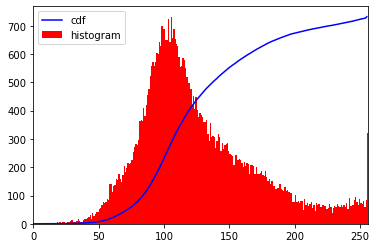

In [40]:
hist,bins = np.histogram(a.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(a.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Plot the Histogram Equalisation

In [41]:
equ = cv2.equalizeHist(a)
res = np.hstack((a,equ)) #stacking images side-by-side
cv2.imwrite('Hist_equalised.png',res)
cv2.imshow('Hist_equalised',res)
cv2.waitKey(0)

-1

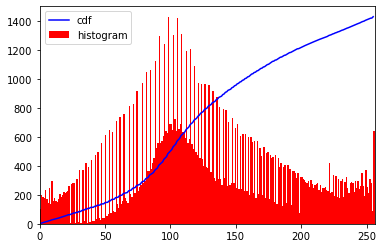

In [42]:
hist,bins = np.histogram(res.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(res.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Plot the Contrast Stretching

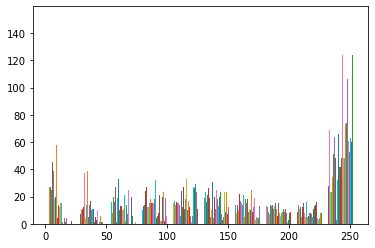

In [43]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
pixelVal_vec = np.vectorize(pixelVal) 
  
contrast_stretched = pixelVal_vec(a, r1, s1, r2, s2) 
cv2.imshow('Contrast Stretched Image',contrast_stretched)
cv2.waitKey(0)
plt.hist(contrast_stretched)
plt.show()

## Plot the Histogram of the original image 

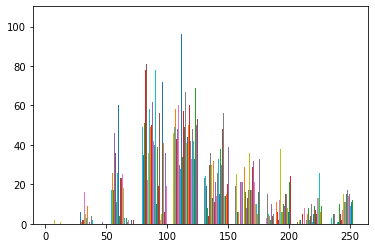

In [44]:
plt.hist(a)
plt.show()